In [25]:
sc
sqlc = SQLContext(sc)

In [6]:
import csv

In [5]:
df = spark.read.load("processed_2011-2017_fixed.csv",format='csv', header=True)

In [6]:
df.take(5)

[Row(_c0=u'0', Conditions=u'Clear', DateUTC=u'2011-01-01 05:51:00', DatetimeEDT=u'2011-01-01 00:51:00', Dew_PointF=u'28.9', Events=None, Freezing=u'0', Gust_SpeedMPH=u'-', Humidity=u'60', LowVisibility=u'0', PrecipitationIn=u'N/A', Rain=u'0', Sea_Level_PressureIn=u'30.13', Snow=u'0', TemperatureF=u'42.1', TimeEDT=u'12:51 AM', VisibilityMPH=u'7.0', WindDirDegrees=u'240', Wind_Direction=u'WSW', Wind_SpeedMPH=u'5.8', Windy=u'0'),
 Row(_c0=u'1', Conditions=u'Clear', DateUTC=u'2011-01-01 06:51:00', DatetimeEDT=u'2011-01-01 01:51:00', Dew_PointF=u'28.9', Events=None, Freezing=u'0', Gust_SpeedMPH=u'-', Humidity=u'58', LowVisibility=u'0', PrecipitationIn=u'N/A', Rain=u'0', Sea_Level_PressureIn=u'30.12', Snow=u'0', TemperatureF=u'43.0', TimeEDT=u'1:51 AM', VisibilityMPH=u'7.0', WindDirDegrees=u'240', Wind_Direction=u'WSW', Wind_SpeedMPH=u'8.1', Windy=u'0'),
 Row(_c0=u'2', Conditions=u'Clear', DateUTC=u'2011-01-01 07:51:00', DatetimeEDT=u'2011-01-01 02:51:00', Dew_PointF=u'28.9', Events=None, Fr

In [8]:
df.take(1)

[Row(_c0=u'0', Conditions=u'Clear', DateUTC=u'2011-01-01 05:51:00', DatetimeEDT=u'2011-01-01 00:51:00', Dew_PointF=u'28.9', Events=None, Freezing=u'0', Gust_SpeedMPH=u'-', Humidity=u'60', LowVisibility=u'0', PrecipitationIn=u'N/A', Rain=u'0', Sea_Level_PressureIn=u'30.13', Snow=u'0', TemperatureF=u'42.1', TimeEDT=u'12:51 AM', VisibilityMPH=u'7.0', WindDirDegrees=u'240', Wind_Direction=u'WSW', Wind_SpeedMPH=u'5.8', Windy=u'0')]

In [13]:
df.take(1)[0].asDict()

{'Conditions': u'Clear',
 'DateUTC': u'2011-01-01 05:51:00',
 'DatetimeEDT': u'2011-01-01 00:51:00',
 'Dew_PointF': u'28.9',
 'Events': None,
 'Freezing': u'0',
 'Gust_SpeedMPH': u'-',
 'Humidity': u'60',
 'LowVisibility': u'0',
 'PrecipitationIn': u'N/A',
 'Rain': u'0',
 'Sea_Level_PressureIn': u'30.13',
 'Snow': u'0',
 'TemperatureF': u'42.1',
 'TimeEDT': u'12:51 AM',
 'VisibilityMPH': u'7.0',
 'WindDirDegrees': u'240',
 'Wind_Direction': u'WSW',
 'Wind_SpeedMPH': u'5.8',
 'Windy': u'0',
 '_c0': u'0'}

In [14]:
sqlContext.dropTempTable

<bound method SQLContext.dropTempTable of <pyspark.sql.context.SQLContext object at 0x111d55cd0>>

In [15]:
sqlContext.dropTempTable()

TypeError: dropTempTable() takes exactly 2 arguments (1 given)

In [7]:
sqlContext.registerDataFrameAsTable(df, 'df')

In [17]:
from pyspark.sql.types import IntegerType

In [18]:
from pyspark.sql import functions

In [214]:
def months(x):
    month = {1:"January",
             2:"Feburary",
             3:"March",
             4:"April",
             5:"May",
             6:"June",
             7:"July",
             8:"August",
             9:"September",
             10:"October",
             11:"November",
             12:"December"}
    return str(month[x])

def reverse_months(x):
    month = {1:"January",
             2:"Feburary",
             3:"March",
             4:"April",
             5:"May",
             6:"June",
             7:"July",
             8:"August",
             9:"September",
             10:"October",
             11:"November",
             12:"December"}
    return str(month[x])

In [20]:
months(1)

'January'

In [64]:
resultDict = {}

for year in range(2012, 2018):
    resultDict[year] = {}    
    for m in range(1, 13):
        if m < 10:
            month = "0" + str(m)
        else:
            month = m
        resultDict[year][month] = {}
        
        current = resultDict[year][month]
        
            
        main_query = "select * from df where DateUTC like '{0}-{1}%'".format(year, month)
        total_count = sqlContext.sql(main_query).count()
        
            
        resultDict[year][month]["Total"] = total_count
        if total_count == 0:
            break
            
        query = main_query + "and windy = '1'"
        
        resultDict[year][month]["Windy"] = sqlContext.sql(query).count()
        current["WindyPercent"] = float(current["Windy"]) / current["Total"]
        
        query = main_query + "and rain = '1'"
        current["Rain"] = sqlContext.sql(query).count()
        current["RainPercent"] = float(current["Rain"]) / current["Total"]
        
        query = main_query + "and snow = '1'"
        current["Snow"] = sqlContext.sql(query).count()
        current["SnowPercent"] = float(current["Snow"]) / current["Total"]

        
        query = main_query + "and Freezing = '1'"
        current["Freezing"] = sqlContext.sql(query).count()
        current["FreezingPercent"] = float(current["Freezing"]) / current["Total"]

        
        query = main_query + "and LowVisibility = '1'"
        current["LowVisibility"] = sqlContext.sql(query).count()
        current["LowVisbilityPercent"] = float(current["LowVisibility"]) / current["Total"]

        

print resultDict

{2016: {'02': {'RainPercent': 0.10656620021528525, 'Freezing': 250, 'WindyPercent': 0.021528525296017224, 'Rain': 99, 'Snow': 62, 'LowVisbilityPercent': 0.1216361679224973, 'Windy': 20, 'SnowPercent': 0.06673842841765339, 'LowVisibility': 113, 'FreezingPercent': 0.2691065662002153, 'Total': 929}, '03': {'RainPercent': 0.06514285714285714, 'Freezing': 80, 'WindyPercent': 0.027428571428571427, 'Rain': 57, 'Snow': 73, 'LowVisbilityPercent': 0.07085714285714285, 'Windy': 24, 'SnowPercent': 0.08342857142857144, 'LowVisibility': 62, 'FreezingPercent': 0.09142857142857143, 'Total': 875}, '01': {'RainPercent': 0.05282112845138055, 'Freezing': 330, 'WindyPercent': 0.028811524609843937, 'Rain': 44, 'Snow': 62, 'LowVisbilityPercent': 0.0744297719087635, 'Windy': 24, 'SnowPercent': 0.0744297719087635, 'LowVisibility': 62, 'FreezingPercent': 0.39615846338535415, 'Total': 833}, '06': {'RainPercent': 0.06197854588796186, 'Freezing': 0, 'WindyPercent': 0.0011918951132300357, 'Rain': 52, 'Snow': 0, 'Lo

In [128]:
import json
from ast import literal_eval as make_tuple

def months(x):
    month = {1:"January",
             2:"Feburary",
             3:"March",
             4:"April",
             5:"May",
             6:"June",
             7:"July",
             8:"August",
             9:"September",
             10:"October",
             11:"November",
             12:"December"}
    return str(month[x])

carlDict = {}

for year in range(2012, 2018):
    carlDict[year] = {}
    
    with open(str(year)) as datafile:
        data = json.load(datafile)
        for m in range(1, 13):
            if m < 10:
                month = "0" + str(m)
            else:
                month = m
            
            freeze_data = data["Freezing"]
            collisions = freeze_data["Percent of Collisions in Each Month That Are Freezing Collisions (Freezing %)"]
            carlDict[year]["Freezing"] = {}
            for i in collisions:
                tup = make_tuple(i)
                carlDict[year]["Freezing"][tup[0]] = tup[1]
                
            
            rain_data = data["Rain"]
            rain_collisions = rain_data["Percent of Collisions in Each Month That Are Rain Collisions (Rain %)"]
            carlDict[year]["Raining"] = {}
            for i in rain_collisions:
                tup = make_tuple(i)
                carlDict[year]["Raining"][tup[0]] = tup[1]
                
            snow_data = data["Snow"]
            collisions = snow_data["Percent of Collisions in Each Month That Are Snow Collisions (Snow %)"]
            carlDict[year]["Snow"] = {}
            for i in collisions:
                tup = make_tuple(i)
                carlDict[year]["Snow"][tup[0]] = tup[1]
                
            wind_data = data["Windy"]
            collisions = wind_data["Percent of Collisions in Each Month That Are Windy Collisions (Windy %)"]
            carlDict[year]["Windy"] = {}
            for i in collisions:
                tup = make_tuple(i)
                carlDict[year]["Windy"][tup[0]] = tup[1]
                
            fogdata = data["LowVisibility"]
            collisions = fogdata["Percent of Collisions in Each Month That Are Low Visibility Collisions (LowVisibility %)"]
            carlDict[year]["Foggy"] = {}
            for i in collisions:
                tup = make_tuple(i)
                carlDict[year]["Foggy"][tup[0]] = tup[1]
                    
            

In [215]:
print carlDict[2013]["Freezing"]["January"]

total_months = 0

freezeg = 0
raing = 0
snowg = 0
windg = 0
fogg = 0

for year in range(2013, 2018):
    for m in range(1, 13):
        total_months += 1
        
        if m < 10:
            month = "0" + str(m)
        else:
            month = m
        
        #freezing
        if months(m) in carlDict[year]["Freezing"].keys():
            if resultDict[year][month]["FreezingPercent"] < carlDict[year]["Freezing"][months(m)]:
                freezeg += 1
                
        if months(m) in carlDict[year]["Raining"].keys():
            if resultDict[year][month]["RainPercent"] <= carlDict[year]["Raining"][months(m)]:
                raing += 1
                
        if months(m) in carlDict[year]["Snow"].keys():
            if resultDict[year][month]["SnowPercent"] <= carlDict[year]["Snow"][months(m)]:
                snowg += 1
                
        if months(m) in carlDict[year]["Windy"].keys():
            if resultDict[year][month]["WindyPercent"] <= carlDict[year]["Windy"][months(m)] or 0:
                windg += 1
                
        if months(m) in carlDict[year]["Foggy"].keys():
            if resultDict[year][month]["LowVisbilityPercent"] <= carlDict[year]["Freezing"][months(m)] or 0:
                fogg += 1
                
print float(raing) / total_months
print float(fogg) / total_months
print float(snowg) / total_months
print float(windg) / total_months
print float(freezeg) / total_months

35.97
0.866666666667
0.45
0.866666666667
0.833333333333
0.466666666667


In [216]:
print("Rainy collisions occurred more than rain {0}% of months").format(100 * float(raing) / total_months)
print("Foggy collisions occurred more than fog {0}% of months").format(100 * float(fogg) / total_months)
print("Snowy collisions occurred more than snow {0}% of months").format(100 * float(snowg) / total_months)
print("Windy collisions occurred more than wind {0}% of months").format(100 * float(windg) / total_months)
print("Freezing collisions occurred more than freezing {0}% of months").format(100 * float(freezeg) / total_months)


Rainy collisions occurred more than rain 86.6666666667% of months
Foggy collisions occurred more than fog 45.0% of months
Snowy collisions occurred more than snow 86.6666666667% of months
Windy collisions occurred more than wind 83.3333333333% of months
Freezing collisions occurred more than freezing 46.6666666667% of months


In [126]:
print json.dumps(resultDict, indent = 2)

{
  "2016": {
    "02": {
      "RainPercent": 0.10656620021528525, 
      "Freezing": 250, 
      "WindyPercent": 0.021528525296017224, 
      "Rain": 99, 
      "Snow": 62, 
      "LowVisbilityPercent": 0.1216361679224973, 
      "Windy": 20, 
      "SnowPercent": 0.06673842841765339, 
      "LowVisibility": 113, 
      "FreezingPercent": 0.2691065662002153, 
      "Total": 929
    }, 
    "03": {
      "RainPercent": 0.06514285714285714, 
      "Freezing": 80, 
      "WindyPercent": 0.027428571428571427, 
      "Rain": 57, 
      "Snow": 73, 
      "LowVisbilityPercent": 0.07085714285714285, 
      "Windy": 24, 
      "SnowPercent": 0.08342857142857144, 
      "LowVisibility": 62, 
      "FreezingPercent": 0.09142857142857143, 
      "Total": 875
    }, 
    "01": {
      "RainPercent": 0.05282112845138055, 
      "Freezing": 330, 
      "WindyPercent": 0.028811524609843937, 
      "Rain": 44, 
      "Snow": 62, 
      "LowVisbilityPercent": 0.0744297719087635, 
      "Windy": 24, 


In [137]:
with open("CarlDictionary.json", "w") as cdict_file:
    json.dump(carlDict, cdict_file)
    
with open("ResultDictionary.json", "w") as rdict_file:
    json.dump(resultDict, rdict_file)


In [138]:
import matplotlib.pyplot as plt
import numpy as np



In [144]:
resultDict[2016]["01"]

{'Freezing': 330,
 'FreezingPercent': 0.39615846338535415,
 'LowVisbilityPercent': 0.0744297719087635,
 'LowVisibility': 62,
 'Rain': 44,
 'RainPercent': 0.05282112845138055,
 'Snow': 62,
 'SnowPercent': 0.0744297719087635,
 'Total': 833,
 'Windy': 24,
 'WindyPercent': 0.028811524609843937}

In [156]:
months_list = []

In [205]:
months_list = []
for m in range(1, 13):
        #total_months += 1
        
        if m < 10:
            month = "0" + str(m)
        else:
            month = m
        months_list.append(month)
        
len(months_list)

12

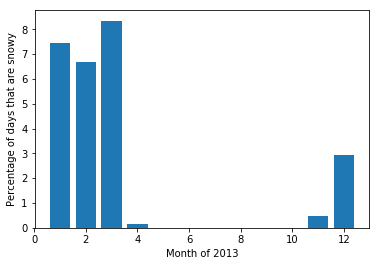

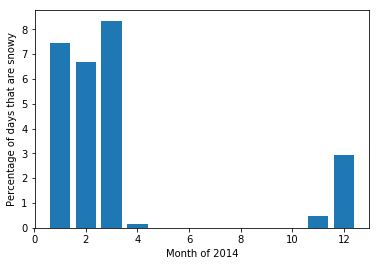

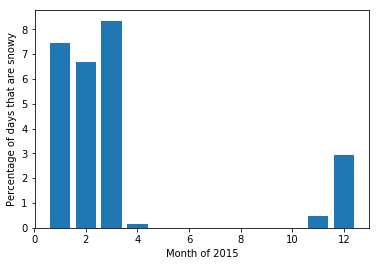

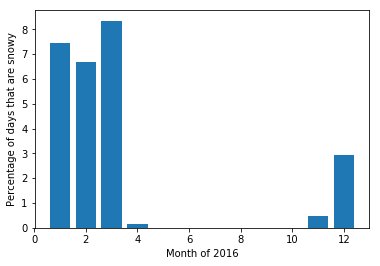

In [210]:
for year in range(2013, 2017):
    rainypercents = [resultDict[2016][i]["SnowPercent"] * 100 for i in months_list]
    plt.bar(range(1,13), rainypercents)
    plt.ylabel("Percentage of days that are snowy")
    plt.xlabel("Month of {0}".format(year))
    plt.show()

12

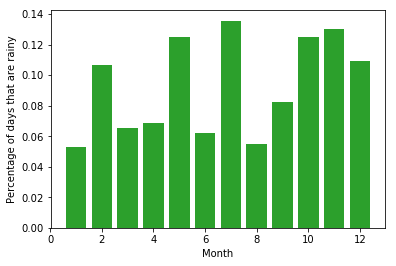